# Prophet
--- 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')

In [3]:
data_m = pd.read_csv('./data_m.csv')
target = pd.read_csv('./target.csv')

In [4]:
data = pd.concat([data_m,target[['CIVIL','IND']]], axis =1)

In [5]:
df = data[['YEAR','CIVIL']]
df.columns = ['ds','y']

In [6]:
df

,ds,y
0,1996-01-01,605519
1,1996-02-01,566323
2,1996-03-01,477514
3,1996-04-01,337797
4,1996-05-01,184522
...,...,...
295,2020-08-01,398661
296,2020-09-01,380235
297,2020-10-01,616682
298,2020-11-01,1093747


In [7]:
m = Prophet()
m.fit(df)

19:21:23 - cmdstanpy - INFO - Chain [1] start processing
19:21:23 - cmdstanpy - INFO - Chain [1] done processing


In [8]:
future = m.make_future_dataframe(periods=60, freq= 'MS')
future.tail()

,ds
355,2025-08-01
356,2025-09-01
357,2025-10-01
358,2025-11-01
359,2025-12-01


In [9]:
df_forecast = m.predict(future)
df_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(13)

,ds,yhat,yhat_lower,yhat_upper
347,2024-12-01,1.688476e+06,1.519424e+06,1.851177e+06
348,2025-01-01,1.848524e+06,1.661396e+06,2.022339e+06
349,2025-02-01,1.556328e+06,1.392421e+06,1.735800e+06
350,2025-03-01,1.324916e+06,1.140486e+06,1.495894e+06
351,2025-04-01,9.253619e+05,7.555142e+05,1.110011e+06
352,2025-05-01,6.584258e+05,4.859266e+05,8.220407e+05
353,2025-06-01,5.361148e+05,3.527346e+05,7.013054e+05
354,2025-07-01,5.209797e+05,3.439727e+05,6.904613e+05
355,2025-08-01,4.997854e+05,3.250471e+05,6.739194e+05
356,2025-09-01,5.078901e+05,3.270480e+05,6.904214e+05


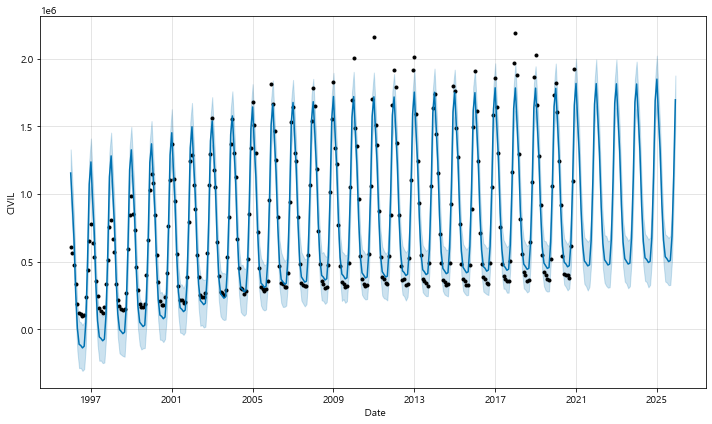

<Figure size 1728x1152 with 0 Axes>

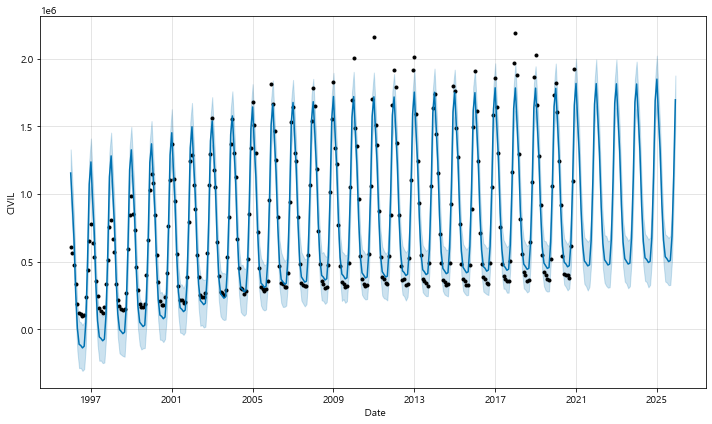

In [10]:
# 예측값 시각화
plt.figure(figsize=(24,16))
m.plot(df_forecast, xlabel = ' Date', ylabel = 'CIVIL')

C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\prophet\plot.py:194: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.tight_layout()
c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


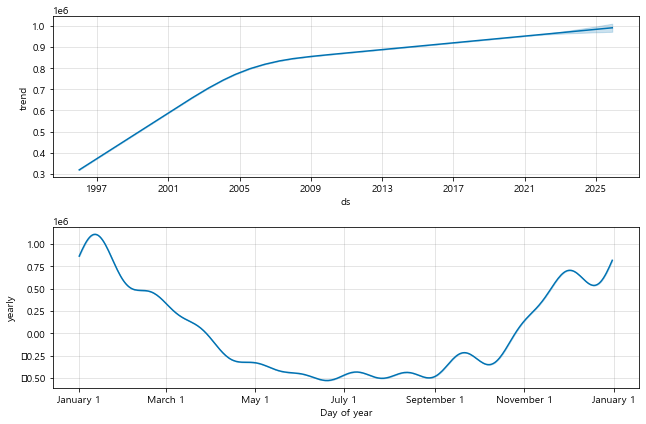

In [11]:
fig2 = m.plot_components(df_forecast)
plt.show()

In [12]:
len(data.columns)

37

In [13]:
df_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1996-01-01,318487.783024,9.646684e+05,1.329085e+06,318487.783024,3.184878e+05,835951.681139,835951.681139,835951.681139,835951.681139,835951.681139,835951.681139,0.0,0.0,0.0,1.154439e+06
1,1996-02-01,323064.844081,7.324464e+05,1.083871e+06,323064.844081,3.230648e+05,587831.552576,587831.552576,587831.552576,587831.552576,587831.552576,587831.552576,0.0,0.0,0.0,9.108964e+05
2,1996-03-01,327346.610875,4.872207e+05,8.358018e+05,327346.610875,3.273466e+05,334884.195594,334884.195594,334884.195594,334884.195594,334884.195594,334884.195594,0.0,0.0,0.0,6.622308e+05
3,1996-04-01,331923.671932,8.848836e+04,4.402740e+05,331923.671932,3.319237e+05,-66140.289038,-66140.289038,-66140.289038,-66140.289038,-66140.289038,-66140.289038,0.0,0.0,0.0,2.657834e+05
4,1996-05-01,336353.085858,-1.645527e+05,1.781445e+05,336353.085858,3.363531e+05,-329371.025490,-329371.025490,-329371.025490,-329371.025490,-329371.025490,-329371.025490,0.0,0.0,0.0,6.982060e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,2025-08-01,989208.952677,3.250471e+05,6.739194e+05,972115.670865,1.006482e+06,-489423.529503,-489423.529503,-489423.529503,-489423.529503,-489423.529503,-489423.529503,0.0,0.0,0.0,4.997854e+05
356,2025-09-01,989888.171158,3.270480e+05,6.904214e+05,972282.415727,1.007675e+06,-481998.049241,-481998.049241,-481998.049241,-481998.049241,-481998.049241,-481998.049241,0.0,0.0,0.0,5.078901e+05
357,2025-10-01,990545.479366,5.073908e+05,8.582300e+05,972230.438704,1.008956e+06,-303119.675916,-303119.675916,-303119.675916,-303119.675916,-303119.675916,-303119.675916,0.0,0.0,0.0,6.874258e+05
358,2025-11-01,991224.697847,9.623069e+05,1.307612e+06,972581.191836,1.010204e+06,140813.938101,140813.938101,140813.938101,140813.938101,140813.938101,140813.938101,0.0,0.0,0.0,1.132039e+06


In [14]:
range(len(data.columns)-1)

range(0, 36)

In [15]:
data.columns

Index(['YEAR', 'AT', 'LT', 'HT', 'CAP_TEMP_EF', 'DONGNAM_TEMP_EF',
       'DAEGYUNG_TEMP_EF', 'CHOONG_TEMP_EF', 'HONAM_TEMP_EF', 'MEAN_TEMP_EF',
       'POWER_WATER', 'POWER_FIRE', 'POWER_NUCLEAR', 'POWER_NAEYEON',
       'POWER_GROUP', 'POWER_TRANS', 'POWER_GAS', 'POWER_JUNG', 'POWER_MOO',
       'POWER_YOU', 'POWER_LNG', 'all', 'family', 'public', 'service',
       'civil_sum', 'argri_fishing', 'mining', 'manufact', 'ind_sum',
       'QUARTER', 'Value', 'RV', 'GAS', 'OTHER OIL PRODUCT', 'CIVIL', 'IND'],
      dtype='object')

In [16]:
col_name = ['YEAR', 'AT', 'LT', 'HT', 'CAP_TEMP_EF', 'DONGNAM_TEMP_EF',
       'DAEGYUNG_TEMP_EF', 'CHOONG_TEMP_EF', 'HONAM_TEMP_EF', 'MEAN_TEMP_EF',
       'POWER_WATER', 'POWER_FIRE', 'POWER_NUCLEAR', 'POWER_NAEYEON',
       'POWER_GROUP', 'POWER_TRANS', 'POWER_GAS', 'POWER_JUNG', 'POWER_MOO',
       'POWER_YOU', 'POWER_LNG', 'all', 'family', 'public', 'service',
       'civil_sum', 'argri_fishing', 'mining', 'manufact', 'ind_sum',
       'QUARTER', 'Value', 'RV', 'GAS', 'OTHER OIL PRODUCT', 'CIVIL', 'IND']

In [17]:
col_name[1]

'AT'

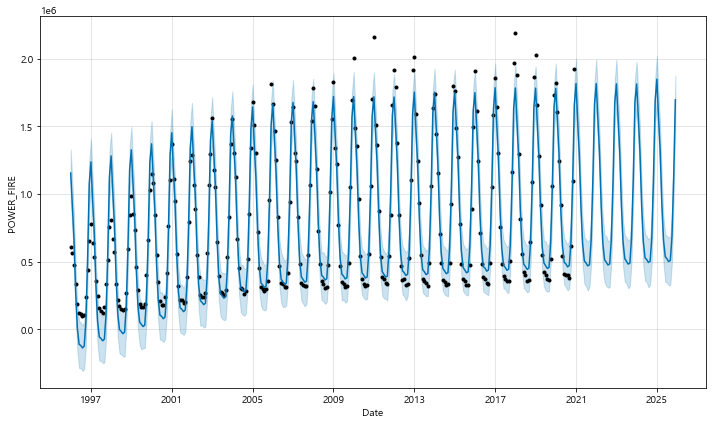

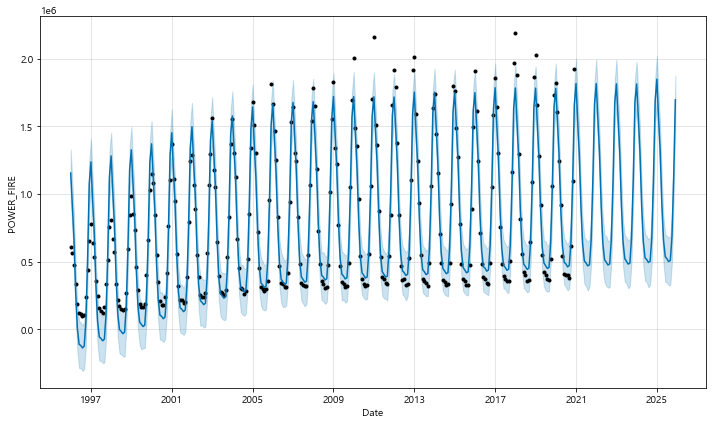

In [18]:
m.plot(df_forecast, xlabel = 'Date', ylabel = 'POWER_FIRE')

19:21:25 - cmdstanpy - INFO - Chain [1] start processing
19:21:25 - cmdstanpy - INFO - Chain [1] done processing


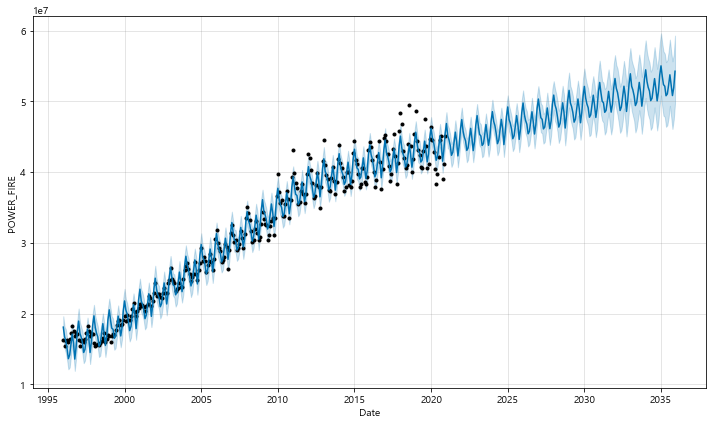

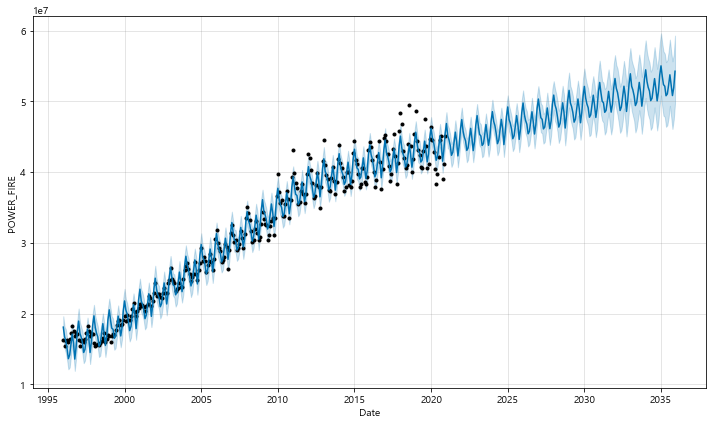

In [19]:
df = data[['YEAR','all']]
df.columns = ['ds','y']
m = Prophet()
m.fit(df)

future = m.make_future_dataframe(periods=180, freq= 'MS')
df_forecast = m.predict(future)

m.plot(df_forecast, xlabel = 'Date', ylabel = 'POWER_FIRE')

19:21:26 - cmdstanpy - INFO - Chain [1] start processing
19:21:26 - cmdstanpy - INFO - Chain [1] done processing


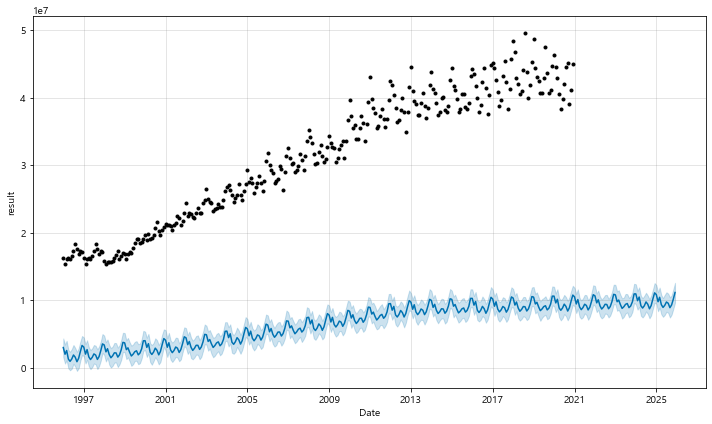

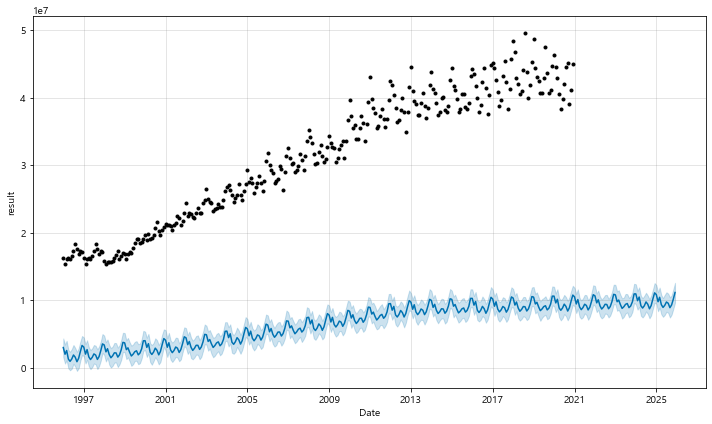

In [20]:
df = data[['YEAR','POWER_FIRE']]
df.columns = ['ds','y']

model = Prophet()

model.fit(df)

future = model.make_future_dataframe(periods=60, freq= 'MS')
df_forecast = model.predict(future)

# 시각화
#plt.subplot(6,6,i)
m.plot(df_forecast, xlabel = 'Date', ylabel = 'result')

In [21]:
for i in range(1,37):
    col_name[i]

# 교차검증 분석
---

In [22]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='300 month', period ='6 month', horizon= '12 month', parallel = 'processes')
df_cv.head()

ValueError: invalid unit abbreviation: month